<a href="https://colab.research.google.com/github/Paloma-Moya-Tudela/AA_PRACTICA2_GRUPO_2/blob/main/A_PRACTICA2_GRUPO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRUPO 2**

María García Rodríguez

Paloma Moya Tudela

Sofía Peña González

Elena Peral Pastor



# RESUMEN

En la anterior práctica trabajamos las Redes de Neuronas Artificiales (RNA)con un ejemplo. Utilizando la misma baso de datos, se estudiarán un tipo específico de estructuras de red que la asignatura de “Aprendizaje Automático” nos da a conocer: las Redes de Neuronas Convolucionales (CNN).

Por tanto, este segundo trabajo irá dirigido a profundizar en el funcionamiento de estas redes. Será interesante comparar los resultados obtenidos en ambas prácticas, con el fin de averiguar - de manera práctica - las diferencias entre ambos. De esta forma, al final del estudio seremos capaces de identificar los casos de uso óptimo para cada una de las redes.


# ÍNDICE



*   Introducción
*   Resolución
*   Conclusiones
*   Reflexiones
*   Referencias Bibliográficas







# INTRODUCCIÓN

En la 'Práctica 1' se mencionaron tanto los aspectos más relevantes de las Redes de Neuronas Artificiales, como su semejanza con la neurología biológica; y se dio a entender el gran impacto que la Inteligencia Artificial (IA) está cobrando en nuestras vidas. Por consiguiente, y con el fin de no ser repetitivos, únicamente presentaremos en otro estilo de red neuronal: la Red de Neuronas Convolucionales.

Este proyecto volverá a examinar los productos de la tienda de moda online alemana especializada en ventas de ropa y zapatos 'Zalando' (www.zalando.com).

Este estudio se centrará en entender el comportamiento de una Red de Neuronas Convolucionales. Asimismo, servirá de gran ayuda en la comprensión de sus similitudes y diferencias con una Red de Neuronas Artificiales como aquella de la práctica previa.

# RESOLUCIÓN

El primer paso será comprender el enunciado y extraer los datos que se nos aportan.

**PROBLEMA:**

* Reconocer y clasificar imágenes de ropa - en escala de grises - en sus diferentes tipologías (10). Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.
* Crear un modelo de Red de Neuronas COnvolucionales en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST - precargado en Keras - y que ya se ha utilizado para la 'Prática 1'.
* Se dispone de 70k imágenes del conjunto de datos de Fashion-MNIST en baja resolución (28 x 28 píxeles): artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. Se usarán 60K imágenes para el entrenamiento de la red, y 10K imágenes para evaluar la precisión con la que la red aprende a clasificarlas.


Una vez se tienen claro los materiales con los que se trabajará, se podrá empezar a incorporar código. Sin embargo, antes de comenzar importemnos qyuras y el resto de librerías necesarias para la red neuronal, asegurando que es la versión 2.0.0 (o superior) de TensorFlow.


**DISEÑO, ENTRENAMIENTO Y TEST DE UN SISTEMA DE REDES DE NEURONAS ARTIFICIALES**


In [1]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

import numpy as np
import pandas as pd
import matplotlib.image as mpim
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


A continuación, cargamos el conjunto de datos  MNIST en Keras con el que vamos a trabajar en esta prática.


In [2]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
# mnist = tf.keras.datasets.mnist
from keras.datasets import mnist

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Al cargar el set de datos retorna cuatro arreglos en NumPy:
- `train_images` y `train_labels` son el **conjunto de entrenamiento** (los datos de los que aprenderá el modelo).
- `test_images` y `test_labels` son el conjunto de pruebas (los datos con los que testearemos el modelo ya entrenado).
- Las imágenes están **codificadas** como matrices `Numpy`, y las etiquetas son un vector de números con valores entre el 0 y el 9 (imágenes y etiquetas tienen una correspondencia 1 a 1) 

| *CLASE* | *PRENDA* |
|-----------|------------|
| 0         | T-shirt    |
| 1         | Trouser    |
| 2         | Pullover   |
| 3         | Dress      |
| 4         | Coat       |
| 5         | Sandal     |
| 6         | Shirt      |
| 7         | Sneaker    |
| 8         | Bag        |
| 9         | Ankle boot |

Como los `Class names` no están incluidos los podremos a mano en el siguiente código: 

In [3]:
nombres = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Una vez tenemos los datos preparados, se puede proceder a revisar los **datos de entrenamiento**.

## Pre-procesamiento del set de datos

In [4]:
print(train_images.shape)

(60000, 28, 28)


Esto nos indica que el 'Dataset' de los **datos de entrenamiento** contiene 60K imágenes de 28x28, tal y como indica el enunciado. Hagamos lo mismo con los datos correspondientes a las imágenes de 'test':


In [5]:
print(test_images.shape)

(10000, 28, 28)


De esta manera, apreciamos que se trata de un array de 10K imágenes de 28x28.


A continución, veamos las imágenes de otra forma. Por ejemplo, representemos la matriz de la imagen correspondiente a la posición 0 del array de las imágenes de entrenamiento:

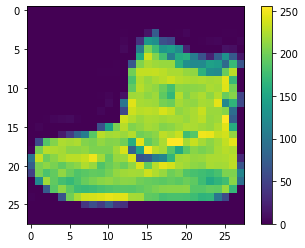

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Una vez se han comprobado las dimensiones de los arrays que se necesitarán, y se tiene clara la estructura de los datos de entrada, nos encontramos con un problema: se observa que los valores oscilan en un rango entre 0 y 250. Sin embargo, si se desea aplicarlos a la red neuronal convolucional, deben ser transformados a valores entre 0 y 1. De esta forma, nos aseguramos de que los datos de entrenamiento y de test se hayan normalizado, y puedan ser porcesados de la misma manera. Arreglémoslo de la siguiente forma:

In [7]:
# 3.- NORMALIZACIÓN DE LOS DATOS (IMÁGENES DE ENTRENAMIENTO Y DE TEST)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [8]:
print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)


Volvamos a mostrar la imagen anterior. Esta vez, los valores se presentarán en el rango [0,1], debido a la normalización de los datos previamente realizada:

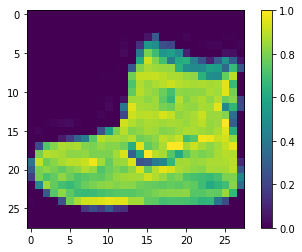

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

A su vez, existe la posibilidad de visalizar las imágenes en su forma matricial. Utilicemos como ejemplo la imagen correspondiente a la posición 2000 del array de los datos de entrenamiento.



In [10]:
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[20000]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

Simula la silueta de un 'sneaker'; así que, comprobémoslo con su correspondiente imagen asociada. Cabe destacar que observamos que los valores seguirán estando entre 0 y 1:

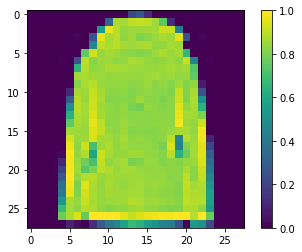

In [11]:
plt.figure()
plt.imshow(train_images[2000])
plt.colorbar()
plt.grid(False)
plt.show()

Por último, antes de comenzar con la red neuronal convolucional, incluimos una representación de los 10 primeros elementos con sus correspondientes etiquetas. De esta forma, nos aseguramos de que el 'Dataset' sea correcto.

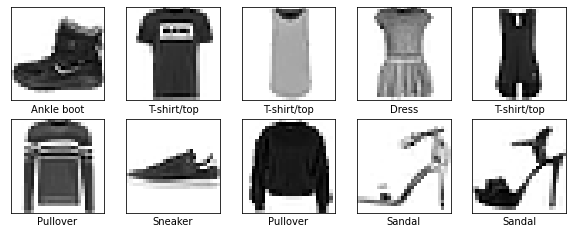

In [12]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(nombres[train_labels[i]])
plt.show()

## Configuración de los casos

***1. Configurar y entrenar los siguientes modelos de red de neuronas convolucionales, analizando y reflexionando sobre los resultados.***

**Caso 1**

In [13]:
# CREAR EL MODELO DE RED NEURONAL CNN:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1.add(Flatten()) # Capa Flatten

model1.add(Dense(10, activation='softmax')) # Última capa densa

In [14]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1.compile(loss='sparse_categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

history = model1.fit

model1.fit(train_images, train_labels,
           epochs=5)

test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc1)

Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 0.8060 - accuracy: 0.7149
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5140 - accuracy: 0.8156
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4534 - accuracy: 0.8401
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4184 - accuracy: 0.8516
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.8608
Test accuracy: 0.86080002784729


**Caso 2**

In [15]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model2.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model2.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model2.add(Flatten()) # Capa Flatten

model2.add(Dense(65,activation='relu')) # Penúltima capa densa
model2.add(Dense(10, activation='softmax')) # Última capa densa

In [16]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

history = model2.fit

model2.fit(train_images, train_labels,
           epochs=5)

test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc2)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8076 - accuracy: 0.7079
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5151 - accuracy: 0.8144
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4373 - accuracy: 0.8444
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3941 - accuracy: 0.8597
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3690 - accuracy: 0.8667
Test accuracy: 0.8666999936103821


**Caso 3**

In [17]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model3.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model3.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model3.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model3.add(Flatten()) # Capa Flatten

model3.add(Dense(65,activation='relu')) # Penúltima capa densa
model3.add(Dense(10, activation='softmax')) # Última capa densa

In [18]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model3.compile(loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history = model3.fit

model3.fit(train_images, train_labels,
           epochs=5)

test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc3)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4109 - accuracy: 0.8529
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2709 - accuracy: 0.9009
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2291 - accuracy: 0.9141
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2004 - accuracy: 0.9252
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2601 - accuracy: 0.9092
Test accuracy: 0.9092000126838684


## Salidas

***2. Explicar la salida de la llamada model.summary() de cada uno de los 3 casos.***

Los resúmenes de cada modelo nos muestran los distintos tensores - especificados - con los que se va a trabajar, a la vez que el total de parámetros entrenables. 

In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

A continuación, explicaremos la razón de los tensores de salida y los parámetros de cada una de las capas:
- 1ª Capa Convolucional: 
- 1ª Capa Pooling:
- 2ª Capa Convolucional: 
- 2ª Capa Pooling:
- Capa Flatten: 
- Capa Dense:

En total, existen 62.346 parámetros entrenables: 

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 65)               

Seguiremos la misma estructura explicativa que se aplicó en el primer modelo:
- 1ª Capa Convolucional: 
- 1ª Capa Pooling:
- 2ª Capa Convolucional: 
- 2ª Capa Pooling:
- Capa Flatten: 
- Capa Dense:

En total, existen 485,461 parámetros entrenables: 

In [21]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

Al igual que los modelos anteriores, se dará a conocer de dónde salen los valores expuestos en este resumen:
- 1ª Capa Convolucional: 
- 1ª Capa Pooling:
- 2ª Capa Convolucional: 
- 2ª Capa Pooling:
- Capa Flatten: 
- Capa Dense:

En total, existen 485,461 parámetros entrenables, al igual que el 'Modelo 2': 

##Análisis

###Análisis (5 épocas vs 25 épocas)

***3. Analizar e interpretar los resultados del Caso 1 frente a su original si se multiplica por 5 las épocas de entrenamiento (25).***

In [22]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model1b = Sequential()
model1b.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1b.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1b.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1b.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1b.add(Flatten()) # Capa Flatten

model1b.add(Dense(10, activation='softmax')) # Última capa densa

In [23]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1b.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model1b.fit

model1b.fit(train_images, train_labels,
            epochs=25)

test_loss1b, test_acc1b = model1b.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc1b)

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8030 - accuracy: 0.7132
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5049 - accuracy: 0.8184
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4425 - accuracy: 0.8442
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4094 - accuracy: 0.8549
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3864 - accuracy: 0.8624
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3673 - accuracy: 0.8691
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3535 - accuracy: 0.8731
Epoch 8/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3421 - accuracy: 0.8771
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3309 - accuracy: 0.8827
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.320

El efecto de multiplicar el número de épocas por 5, provoca un aumento de la precisión del modelo. Esto tiene sentido, ya que...

###Análisis (ReLU vs tanh)

***4. Analiza el resultado del Caso 1 si en lugar de 'ReLU' usas 'tanh' en la función de activación de las dos capas convolucionales.***

In [24]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model1c = Sequential()
model1c.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1c.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1c.add(Conv2D(64, (5, 5), activation='tanh')) # 2ª capa convolucional
model1c.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1c.add(Flatten()) # Capa Flatten

model1c.add(Dense(10, activation='softmax')) # Última capa densa

In [25]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1c.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model1b.fit

model1c.fit(train_images, train_labels,
            epochs=5)

test_loss1c, test_acc1c = model1c.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc1c)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7805 - accuracy: 0.7257
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5131 - accuracy: 0.8148
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4491 - accuracy: 0.8405
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4116 - accuracy: 0.8532
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4222 - accuracy: 0.8490
Test accuracy: 0.8489999771118164


A diferencia que el ejercicio anterior, esta modificación del modelo no provoca casi diferencias en los resultados de la precisión del modelo.

## Comparación de rendimiento

***5. Evaluar cada uno de los 3 modelos comparando el rendimiento del modelo en el conjunto de datos de prueba***

In [26]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
#test_labels = to_categorical(test_labels)
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)
test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#print('test_loss8:', test_loss ,'test_acc8:', test_acc)  Con esto se muestran más decimales

313/313 [==============================] - 1s 3ms/step - loss: 0.2601 - accuracy: 0.9092


Tal y como se muestran en el esquema superior, observamos que se presentan según la función de pérdida decreciente y precisión creciente. Esto es una buena señal global, debido a que tiene sentido que las pérdidas del modelo se vean disminuidas a medida que se consigue aumentar su precisión.

Por otro lado, destacamos que parece que el funcionamiento de los modelos se ve representado por el siguiente orden, considerándolo del mejor rendimiento al de peor calidad: 3º Modelo > 2º Modelo < 1º Modelo.

## Predicciones

***6. Usar cada uno de los 3 modelos para hacer predicciones sobre la 6ª imagen de test (test_images[5]).***

Para comenzar, visualicemos de qué trata la 'Imagen 6':

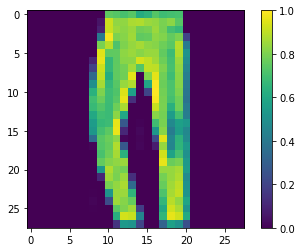

In [27]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Observamos que parece ser un pantalón, que corresponde a la 'Categoría 1' de nuestra clasificación: 'Trouser'.

**Caso 1**

In [28]:
prediction1 = model1.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [29]:
prediction1[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

(Explicar qué información da esto)

In [30]:
np.argmax(prediction1[5])

1

(Explicar qué información da esto)

**Caso 2**

In [31]:
prediction2 = model2.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [32]:
prediction2[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [33]:
np.argmax(prediction2[5])

1

**Caso 3**

In [34]:
prediction3 = model3.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [35]:
prediction3[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
np.argmax(prediction3[5])

1

Parece que los 3 modelos predicen correctamente la clasificación de la imagen en cuestión.

## Gráficas


***7. Utilice el siguiente código para graficar cómo de bien o de mal se comporta el modelo para cada uno de los 3 casos con las 14 primeras imágenes del conjunto de test. Reflexione y comente las diferencias que observa.***

Incluimos las funciones necesarias en las siguientes líneas de código:

In [37]:
# PRIMERA FUNCIÓN:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres[predicted_label],
                                100*np.max(predictions_array),
                                nombres[true_label]),
                                color=color)

# SEGUNDA FUNCIÓN:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

De esta manera, a continuación se expondrán los pares de imágenes-gráficas de las primeras 14 imágenes del conjunto de test.

Los modelos calculan la probabilidad con la que una imagen se corresponde a una determinada clasificación, como ya hemos visto en las predicciones de la quinta imagen. Por consiguiente, puede que prediga perfectamente bien (100% probabilidad) una etiqueta; o, por el contrario, pueden aparecer otras probabilidades de posibles etiquetas (80%; 20%; 10%; 10%; por ejemplo).

Esta idea se representará con ayuda de distintos colores que se verán en las gráficas:
- azul = valores menores del las otras prediciones
- rojo = el valor interpretado por el modelo
- negro = el valor de la categoría real
- verde = 

**Caso 1**

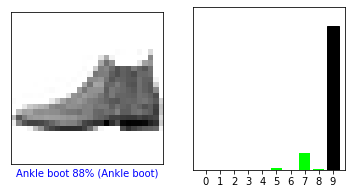

<Figure size 432x288 with 0 Axes>

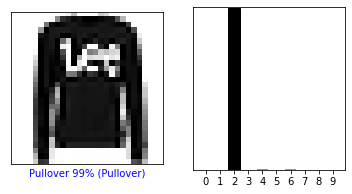

<Figure size 432x288 with 0 Axes>

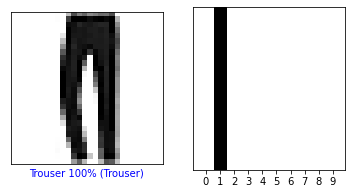

<Figure size 432x288 with 0 Axes>

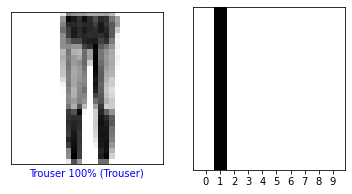

<Figure size 432x288 with 0 Axes>

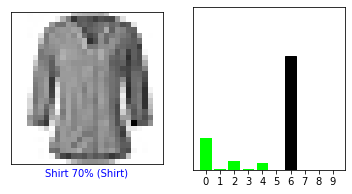

<Figure size 432x288 with 0 Axes>

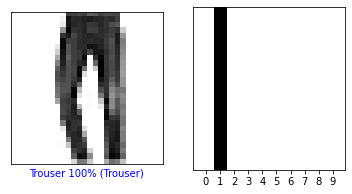

<Figure size 432x288 with 0 Axes>

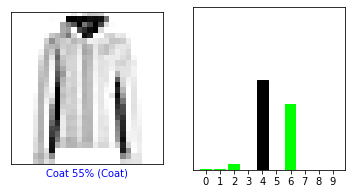

<Figure size 432x288 with 0 Axes>

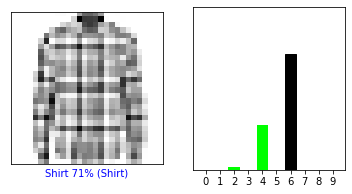

<Figure size 432x288 with 0 Axes>

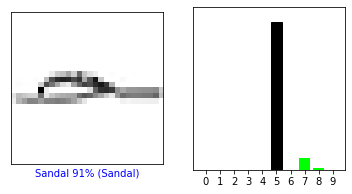

<Figure size 432x288 with 0 Axes>

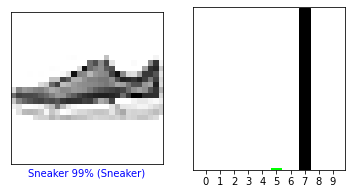

<Figure size 432x288 with 0 Axes>

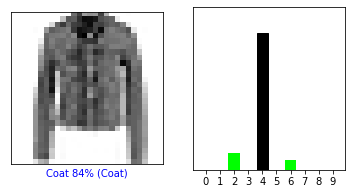

<Figure size 432x288 with 0 Axes>

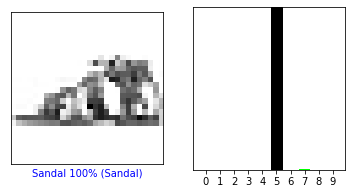

<Figure size 432x288 with 0 Axes>

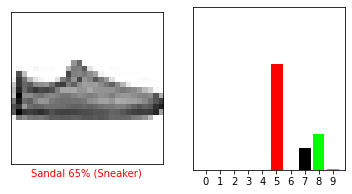

<Figure size 432x288 with 0 Axes>

In [38]:
for i in range(13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction1[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, prediction1[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 2**

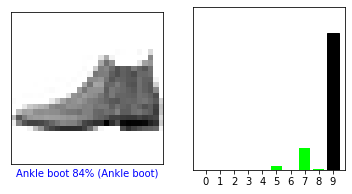

<Figure size 432x288 with 0 Axes>

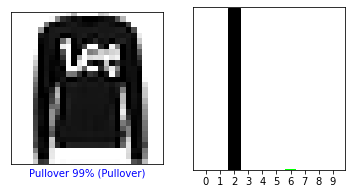

<Figure size 432x288 with 0 Axes>

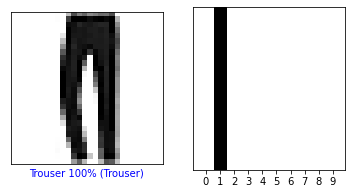

<Figure size 432x288 with 0 Axes>

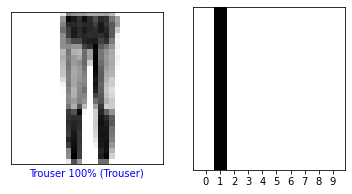

<Figure size 432x288 with 0 Axes>

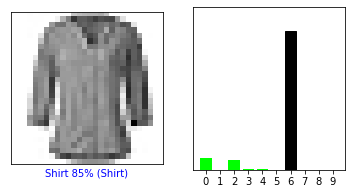

<Figure size 432x288 with 0 Axes>

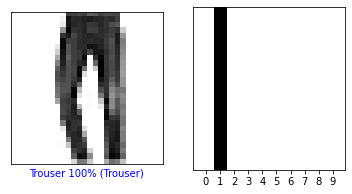

<Figure size 432x288 with 0 Axes>

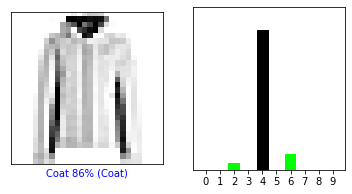

<Figure size 432x288 with 0 Axes>

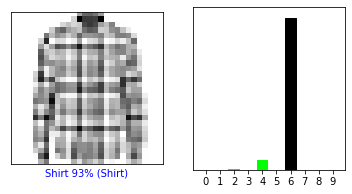

<Figure size 432x288 with 0 Axes>

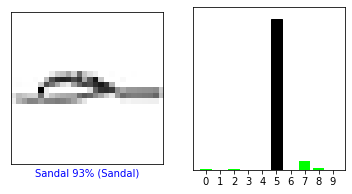

<Figure size 432x288 with 0 Axes>

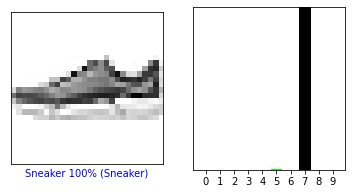

<Figure size 432x288 with 0 Axes>

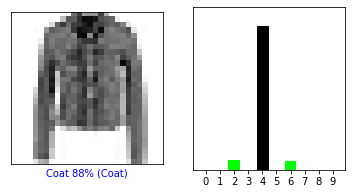

<Figure size 432x288 with 0 Axes>

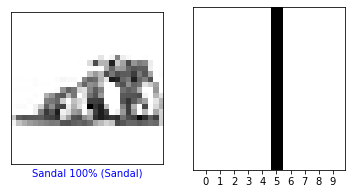

<Figure size 432x288 with 0 Axes>

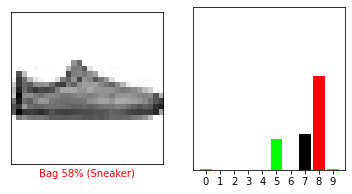

<Figure size 432x288 with 0 Axes>

In [39]:
for i in range(13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction2[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, prediction2[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 3**

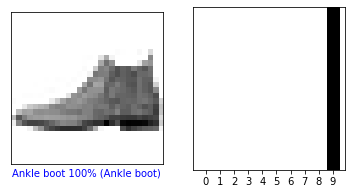

<Figure size 432x288 with 0 Axes>

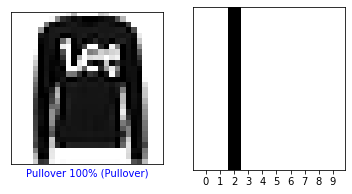

<Figure size 432x288 with 0 Axes>

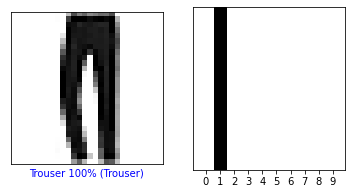

<Figure size 432x288 with 0 Axes>

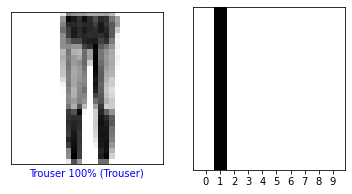

<Figure size 432x288 with 0 Axes>

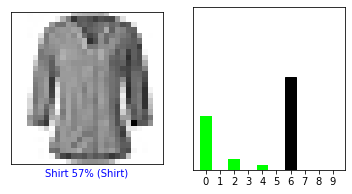

<Figure size 432x288 with 0 Axes>

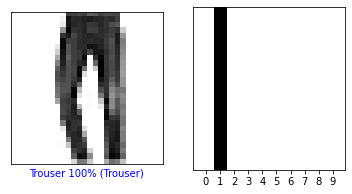

<Figure size 432x288 with 0 Axes>

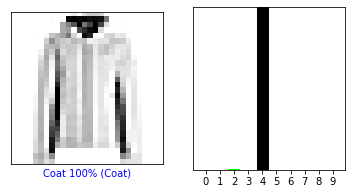

<Figure size 432x288 with 0 Axes>

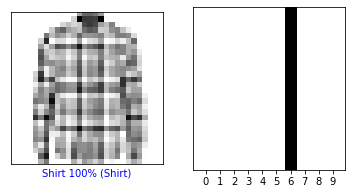

<Figure size 432x288 with 0 Axes>

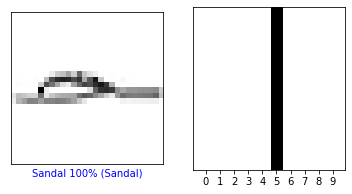

<Figure size 432x288 with 0 Axes>

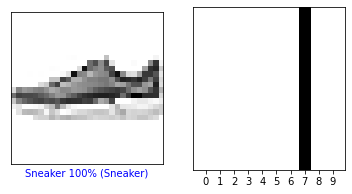

<Figure size 432x288 with 0 Axes>

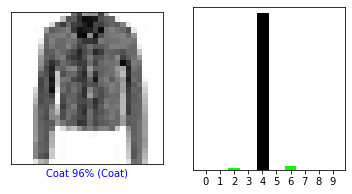

<Figure size 432x288 with 0 Axes>

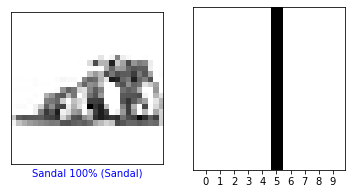

<Figure size 432x288 with 0 Axes>

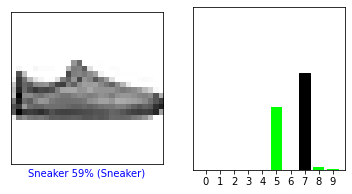

<Figure size 432x288 with 0 Axes>

In [40]:
for i in range(13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction3[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, prediction3[i],  test_labels)
  plt.show()
  plt.clf()

## Comparativa con la Práctica 1


***8. Hacer comparativa con los resultados que obtuvisteis en la 'Práctica 1', con las
capas Dense.***

##Mejoras del modelo

###1ª Mejora del modelo

***9. Ver los conceptos de 'batch_normalization' y 'dropout'; y ver si se podría mejorar
el modelo con ello.
https://keras.io/api/layers/normalization_layers/batch_normalization/***


***https://keras.io/api/layers/regularization_layers/dropout/***

**1. Es importante especificar use_bias=False.**

**3. Callbacks**

Antes de comenzar con su implementación en código, se comenzará introduciendo los términos y casos de uso de cada uno de los conceptos:

- ***batch_normalization***: la idea principal es que se trata de aquella capa en la que se normalizan las entradas. De esta manera, dicha función aplica una transformación que mantiene la media de las salidas cerca de 0,y su desviación típica cerca de 1. Asimismo, cabe destacar que trabaja de diferente forma dependiendo de si se utiliza durante el entrenamiento o durante la evaluación:
  
        1. Durante el entrenamiento: la capa normaliza sus salidas usando la media y la desviación típica del conocido como 'batch' actual de entradas.
        2. Durante la evaluación: la capa normaliza sus salidas usando una media cambiante de la media y la desviación típica de aquellas 'batches' que haya visto en el periodo de entrenamiento.

    Por ende, la capa normalizará únicamente sus salidas durante la evaluación, después de haber estado entrenándose con datos que contengan estadícticas similares a la de los datos de evalución.

In [41]:
from keras import layers

**Caso 1**

In [42]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model1B = Sequential()
model1B.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1B.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1B.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1B.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1B.add(Flatten()) # Capa Flatten

model1B.add(Dense(10, activation='softmax')) # Última capa densa

model1B.add(layers.BatchNormalization()) # Capa Batch Normalization

In [43]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1B.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model1B.fit

model1B.fit(train_images, train_labels,
            epochs=5)

test_loss1B, test_acc1B = model1B.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc1B)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5436 - accuracy: 0.1186
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000
Test accuracy: 0.10000000149011612


**Caso 2**

In [44]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model2B = Sequential()
model2B.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model2B.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model2B.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model2B.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model2B.add(Flatten()) # Capa Flatten

model2B.add(Dense(65,activation='relu')) # Penúltima capa densa

model2B.add(Dense(10, activation='softmax')) # Última capa densa

model2B.add(layers.BatchNormalization()) # Capa Batch Normalization

In [45]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model2B.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model2B.fit

model2B.fit(train_images, train_labels,
            epochs=5)

test_loss2B, test_acc2B = model2B.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc2B)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 3.7494 - accuracy: 0.1130
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.2069 - accuracy: 0.1016
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 6.3596 - accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 6.5842 - accuracy: 0.1000
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 6.5836 - accuracy: 0.1000
Test accuracy: 0.10000000149011612


**Caso 3**

In [46]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model3B = Sequential()
model3B.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model3B.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model3B.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model3B.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model3B.add(Flatten()) # Capa Flatten

model3B.add(Dense(65,activation='relu')) # Penúltima capa densa

model3B.add(Dense(10, activation='softmax')) # Última capa densa

model3B.add(layers.Dropout(0.5)) # Capa Dropout

In [47]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model3B.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history = model3B.fit

model3B.fit(train_images, train_labels,
            epochs=5)

test_loss3B, test_acc3B = model3B.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc3B)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 4.3620 - accuracy: 0.3600
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 3.2016 - accuracy: 0.4302
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.9095 - accuracy: 0.4507
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.8291 - accuracy: 0.4521
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 3.0918 - accuracy: 0.8029
Test accuracy: 0.8029000163078308


- ***dropout***: esta capa establece - de manera aleatoria - unidades de entrada a 0 con una fecuencia de una vez cada paso del tiempo de entrenamiento. Esto ayuda a prevenir el peligroso 'sobre entrenamiento', también conocido por su traducción inglesa como 'overfitting'. Aquellas entradas que no se establezcan como 0 se escalan hasta por "1/(1 - ratio)", de forma que la suma sobre todas las entradas permanece inalterada.

**Caso 1**

In [48]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model1D = Sequential()
model1D.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1D.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1D.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1D.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1D.add(Flatten()) # Capa Flatten

model1D.add(Dense(10, activation='softmax')) # Última capa densa

model1D.add(layers.Dropout(0.5)) # Capa Dropout

In [49]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1D.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model1D.fit

model1D.fit(train_images, train_labels,
            epochs=5)

test_loss1D, test_acc1D = model1D.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc1D)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.2419 - accuracy: 0.3456
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 3.3161 - accuracy: 0.4232
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 3.0071 - accuracy: 0.4422
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.8586 - accuracy: 0.4509
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 2.7881 - accuracy: 0.7976
Test accuracy: 0.7975999712944031


**Caso 2**

In [50]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model2D = Sequential()
model2D.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model2D.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model2D.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model2D.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model2D.add(Flatten()) # Capa Flatten

model2D.add(Dense(65,activation='relu')) # Penúltima capa densa

model2D.add(Dense(10, activation='softmax')) # Última capa densa

model2D.add(layers.Dropout(0.5)) # Capa Dropout

In [51]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model2D.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model2D.fit

model2D.fit(train_images, train_labels,
            epochs=5)

test_loss2D, test_acc2D = model2D.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc2D)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 5.0540 - accuracy: 0.3497
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.5888 - accuracy: 0.4192
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.1692 - accuracy: 0.4389
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.9618 - accuracy: 0.4492
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 3.3240 - accuracy: 0.7669
Test accuracy: 0.7669000029563904


**Caso 3**

In [52]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model3D = Sequential()
model3D.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model3D.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model3D.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model3D.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model3D.add(Flatten()) # Capa Flatten

model3D.add(Dense(65,activation='relu')) # Penúltima capa densa

model3D.add(Dense(10, activation='softmax')) # Última capa densa

model3D.add(layers.Dropout(0.5)) # Capa Dropout

In [53]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model3D.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history = model3D.fit

model3D.fit(train_images, train_labels,
            epochs=5)

test_loss3D, test_acc3D = model3D.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc3D)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 5.7394 - accuracy: 0.2720
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.5513 - accuracy: 0.2820
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.4486 - accuracy: 0.2857
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.4544 - accuracy: 0.2880
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 8.4517 - accuracy: 0.4737
Test accuracy: 0.47369998693466187


Las ventajas de usar 'batch normalization' son parecidas a las ventajas ofrecidas por el uso de 'dropout'. Es posible usar ambos métodos al mismo tiempo; aunque lo recomendable es usar primero 'batch normalization' y después, si fuese necesario, aplicar 'dropout'. Por tanto, debido a que se ha comprobado la efictividad de cada método por separado, a continuación se emplearán ambas al mismo modelo. Analizaremos las diferencias visibles que se produzcan.

###2ª Mejora del modelo

***10. Ver los conceptos de 'callbacks' (Decaimiento del ratio de aprendizaje), y ver si se
podría mejorar el modelo con ello.
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler***

***y***

***https://keras.io/api/callbacks/***

Siguiendo la misma estructura que aquella del apartado anterior, se comenzará exponiendo las ideas generales de los conceptos de ***callbacks***:
Un 'callback' es un objeto capaz de llevar a cabo acciones en diferentes etapas del entrenamiento. Algunos ejemplos podrían ser su aplicación al comenzar o terminar una época ('epoch'), antes o después de un único 'batch',... Por ende, es posible aplicarlos en diversos momentos y con diferentes objetivos.

**Caso 1**

In [54]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model1BD = Sequential()
model1BD.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1BD.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1BD.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1BD.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1BD.add(Flatten()) # Capa Flatten

model1BD.add(Dense(10, activation='softmax')) # Última capa densa

model1BD.add(layers.BatchNormalization()) # Capa Batch Normalization

model1D.add(layers.Dropout(0.5)) # Capa Dropout

In [55]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1BD.compile(loss='sparse_categorical_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])

history = model1BD.fit

model1BD.fit(train_images, train_labels,
             epochs=5)

test_loss1BD, test_acc1BD = model1BD.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc1BD)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6904 - accuracy: 0.4194
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5559 - accuracy: 0.1287
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000
Test accuracy: 0.10000000149011612


**Caso 2**

In [56]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model2BD = Sequential()
model2BD.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model2BD.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model2BD.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model2BD.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model2BD.add(Flatten()) # Capa Flatten

model2BD.add(Dense(65,activation='relu')) # Penúltima capa densa

model2BD.add(Dense(10, activation='softmax')) # Última capa densa

model2BD.add(layers.Dropout(0.5)) # Capa Dropout

In [57]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model2BD.compile(loss='sparse_categorical_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])

history = model2BD.fit

model2BD.fit(train_images, train_labels,
             epochs=5)

test_loss2BD, test_acc2BD = model2BD.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc2BD)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 4.9783 - accuracy: 0.3549
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.5681 - accuracy: 0.4203
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 3.1772 - accuracy: 0.4396
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.9873 - accuracy: 0.4511
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 3.5904 - accuracy: 0.7583
Test accuracy: 0.7583000063896179


**Caso 3**

In [58]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model3BD = Sequential()
model3BD.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model3BD.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model3BD.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model3BD.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model3BD.add(Flatten()) # Capa Flatten

model3BD.add(Dense(65,activation='relu')) # Penúltima capa densa

model3BD.add(Dense(10, activation='softmax')) # Última capa densa

model3BD.add(layers.Dropout(0.5)) # Capa Dropout

In [59]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model3BD.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history = model3BD.fit

model3BD.fit(train_images, train_labels,
             epochs=5)

test_loss3BD, test_acc3BD = model3BD.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc3BD)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 8.2300 - accuracy: 0.1145
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 8.4462 - accuracy: 0.0992
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 8.3642 - accuracy: 0.1002
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 8.3975 - accuracy: 0.1011
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 14.5063 - accuracy: 0.1000
Test accuracy: 0.10000000149011612


# CONCLUSIONES

# REFLEXIONES

Al igual que en el anterior proyecto, este apartado expone los acontecimientos y las dificultades que hemos encontrado como equipo durante su realización. Está compuesto por tres secciones fuertemente relacionadas entre sí:

## 1.   Cómo hemos afrontado la solución de la práctica





Habiendo aprendido de la prática anterior ('Práctica 1'), y con el objetivo de mejorar los resultados obtenidos, tomamos algunas medidas nuevas con el fin de mejorar nuestro rendimiento.

Entre ellas destaca que empezamos a trabajar en ella con mayor tiempo de antelación, con el propósito de estar más preparadas ante posibles imprevistos y tener un mayor tiempo de reacción.

A su vez, hemos tenido más tiempo para aplicar detenidamente la segunda idea: trabajar primero el código de cada ejercicio, anotando únicamente algunos conceptos clave; y después, repasarlo d enuevo, centrándonos en la redacción de las observaciones y conclusiones encontradas.

Esta estructura y conceptos iniciales para atajar la práctica de manera más eficaz posible nos ha permitido alcanzar un buen conocimiento de las Redes de Neuronas Convolucionales y sus utilidades. A su vez, se ha podido lograr una mejor comprensión de la 'Práctica 1' (funcionamiento de las Redes de Neuronas Artificiales) debido a la necesidad de comparar ambos proyectos detenidamente.

## 2.   Cómo se ha dividido el trabajo

Debido a la imposibilidad de trabajar con varios ordenadores al unísono, se han continuado con las distintas estrategias de la anterior práctica:
- Comenzamos estructurando el proyecto de una manera similar a la del proyecto previo, recopilando aquellos conceptos necesarios tanto antiguos como nuevos.
- Avanzamos en el trabajo a través de videollamadas. Esta herramienta permitía a una de nosotras compartir el código por la pantalla, mientras que las demás ayudábamos buscando soluciones con nuestros respectivos ordenadores para avanzar de manera conjunta y eficiente.
- Se comprobó el código en diferentes ordenadores con el propósito de encontrar posibles fallos en la compilación, o errores en la redacción.

## 3.   Cómo se ha gestionado el equipo para trabajar

Siguiendo la línea argumental propuesta, teniendo en cuenta las similitudes de este apartado con el anterior y el carácter casi idéntico con respecto a la 'Práctica 1', explicaremos en más detalle las videollamadas mencionadas.

Nos asignábamos pequeñas tareas - que incluíamos en el proyecto mandándoselas a la compañera con el trabajo abierto, o esperando a incluirlas después - mientras avanzábamos con el código y las conclusiones con el fin de aprovechar el tiempo al máximo.

Sin embargo, también se utilizó tiempo en el que nos encontrábamos físicamente juntas para continuar.

# REFERENCIAS BIBLIOGRÁFICAS

- Apuntes recogidos de GitHub y GoogleColab, a raíz de los contenidos estudiados en el aula
- ***https://keras.io/api/layers/normalization_layers/batch_normalization/***
- ***https://keras.io/api/layers/regularization_layers/dropout/***
- ***https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler***
- ***https://keras.io/api/callbacks/***